In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the training data set
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

In [3]:
# X.head()

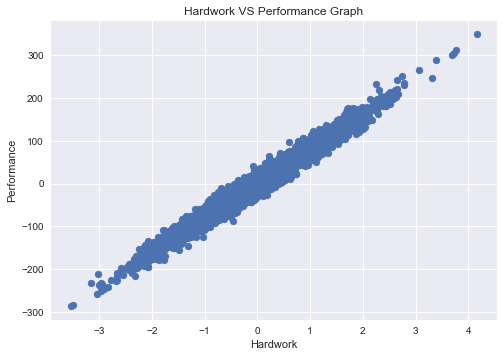

In [4]:
#convert X,y into numpy arrays
X = X.values
Y = Y.values   

#normalize the x (using z-score)
u = X.mean()
sd = X.std()
X = (X-u)/sd

#visualising data set
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title('Hardwork VS Performance Graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [5]:
#Linear Regression

def hypothesis(x,theta):
    #theta = [theta0,theta1]
    
    y_ = theta[0] + theta[1]*x
    return (y_)

def gradient(X,Y,theta):
    m = X.shape[0]  #no. rows in dataset
    grad = np.zeros((2,)) #initialize our gradient randomly
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
     
    return total_error/m

def gradientDescent(X,Y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta,error_list

    

In [6]:
theta,error_list = gradientDescent(X,Y)

In [7]:
theta,error_list

(array([ 0.6838508 , 79.90361453]),
 [array([6576.35005246]),
  array([5363.12510257]),
  array([4380.41289317]),
  array([3584.41600355]),
  array([2939.65852295]),
  array([2417.40496367]),
  array([1994.37958066]),
  array([1651.72902041]),
  array([1374.18206661]),
  array([1149.36903404]),
  array([967.27047765]),
  array([819.77064698]),
  array([700.29578413]),
  array([603.52114523]),
  array([525.13368772]),
  array([461.63984713]),
  array([410.20983626]),
  array([368.55152745]),
  array([334.80829731]),
  array([307.47628091]),
  array([285.33734761]),
  array([267.40481165]),
  array([252.87945752]),
  array([241.11392067]),
  array([231.58383582]),
  array([223.8644671]),
  array([217.61177843]),
  array([212.54710061]),
  array([208.44471157]),
  array([205.12177646]),
  array([202.43019901]),
  array([200.25002128]),
  array([198.48407732]),
  array([197.05366271]),
  array([195.89502687]),
  array([194.95653185]),
  array([194.19635088]),
  array([193.58060429]),
  arr

In [8]:
#predictions
y_ = hypothesis(X,theta)
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

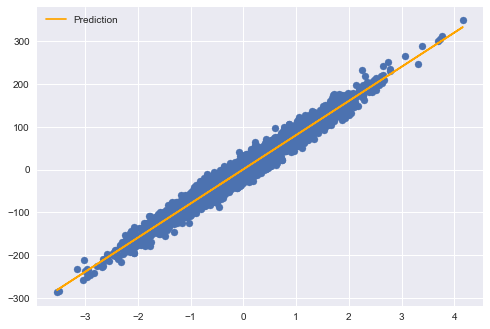

In [9]:
plt.scatter(X,Y)
plt.plot(X,y_,color="orange",label="Prediction")
plt.legend()
plt.show()

In [10]:
X_test = pd.read_csv('./Test Data/Linear_X_Test.csv').values
Y_test = hypothesis(X_test,theta)
Y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [29]:
#score of model
def r2_score(Y,y_):
    num = np.sum((Y-y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [30]:
r2_score(Y,y_)

97.09612226971643